In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing Different libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
dataset=pd.read_csv(r"C:\Users\Admin\Desktop\Viska\Machine Learning\Day-11 standard scaler &Decision tree regression ((recording in Power BI 11th May'24))/insurance.csv")

In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#data cleaning and gathering some info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.shape

(1338, 7)

In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#cheking missing value or null values
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#apply one hot coding 
dataset=pd.get_dummies(dataset,columns=["sex","smoker","region"])
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [10]:
#splitting the dataset into input and output column
x=dataset.drop(columns=['charges'])
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


In [11]:
y=dataset['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [12]:
#Train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size=0.80,random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)


(1070, 11)
(268, 11)


In [14]:
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [15]:
x_train=x_train.astype(int)
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19,2,1,0,1,0,0,1,0,0
1285,47,24,0,1,0,1,0,1,0,0,0
1142,52,24,0,1,0,1,0,0,0,1,0
969,39,34,5,1,0,1,0,0,0,1,0
486,54,21,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31,4,1,0,1,0,1,0,0,0
1130,39,23,5,1,0,1,0,0,0,1,0
1294,58,25,0,0,1,1,0,1,0,0,0
860,37,47,2,1,0,0,1,0,0,0,1


In [16]:
x_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,True,False,True,False,True,False,False,False
887,36,30.020,0,True,False,True,False,False,True,False,False
890,64,26.885,0,True,False,False,True,False,True,False,False
1293,46,25.745,3,False,True,True,False,False,True,False,False
259,19,31.920,0,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,False,True,False,True,False,False,True,False
575,58,27.170,0,True,False,True,False,False,True,False,False
535,38,28.025,1,False,True,True,False,True,False,False,False
543,54,47.410,0,True,False,False,True,False,False,True,False


In [17]:
x_test=x_test.astype(int)
x_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25,2,1,0,1,0,1,0,0,0
887,36,30,0,1,0,1,0,0,1,0,0
890,64,26,0,1,0,0,1,0,1,0,0
1293,46,25,3,0,1,1,0,0,1,0,0
259,19,31,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35,0,0,1,0,1,0,0,1,0
575,58,27,0,1,0,1,0,0,1,0,0
535,38,28,1,0,1,1,0,1,0,0,0
543,54,47,0,1,0,0,1,0,0,1,0


In [18]:
##Standard scaler 

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [20]:
sc.fit(x_train)

StandardScaler()

In [21]:
#here we are converting x_test & x_train in SC.
x_train_sc=sc.transform(x_train)
x_test_sc=sc.transform(x_test)

In [22]:
x_train_sc

array([[ 0.47222651, -1.82630039,  0.73433626, ...,  1.78316783,
        -0.59966106, -0.5723141 ],
       [ 0.54331294, -1.00135045, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [ 0.8987451 , -1.00135045, -0.91119211, ..., -0.56079971,
         1.66760869, -0.5723141 ],
       ...,
       [ 1.3252637 , -0.83636046, -0.91119211, ..., -0.56079971,
        -0.59966106, -0.5723141 ],
       [-0.16755139,  2.79341927,  0.73433626, ..., -0.56079971,
        -0.59966106,  1.74729228],
       [ 1.1120044 , -0.17640051, -0.91119211, ..., -0.56079971,
        -0.59966106,  1.74729228]])

#Model Building 


In [23]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()

In [24]:
#Training process
model.fit(x_train_sc,y_train)


DecisionTreeRegressor()

In [25]:
#prediction 
y_pred=model.predict(x_test_sc)
y_pred

array([ 8604.48365 ,  4571.41305 , 28950.4692  ,  9500.57305 ,
       34166.273   , 11326.71487 ,  2709.24395 , 14692.66935 ,
       23288.9284  ,  9620.3307  , 19199.944   ,  6986.697   ,
        4040.55825 , 46200.9851  , 45008.9555  , 48885.13561 ,
        9304.7019  , 42211.1382  ,  8232.6388  , 21348.706   ,
        5615.369   ,  8522.003   ,  1253.936   ,  2741.948   ,
        9620.3307  , 10338.9316  , 12638.195   ,  5312.16985 ,
        9447.316375,  1622.0356  ,  8162.71625 , 11840.77505 ,
        1629.8335  ,  5325.651   ,  3410.324   , 12797.20962 ,
        2007.945   ,  7626.993   , 24873.3849  , 39983.42595 ,
        4830.63    ,  2639.0429  , 11576.13    , 12142.5786  ,
        5375.038   , 12925.886   , 26018.95052 ,  5615.369   ,
       42760.5022  ,  4673.3922  , 13887.9685  ,  1720.3537  ,
        6500.2359  ,  1708.0014  , 10976.24575 , 10141.1362  ,
        3268.84665 , 58571.07448 , 12231.6136  , 10338.9316  ,
       13390.559   ,  4949.7587  , 15170.069   ,  7201.

In [26]:
#Actual Output
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

#Performance evaulatuion


In [27]:
from sklearn.metrics import mean_squared_error,r2_score


In [28]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [29]:
print("Mean Squared Error:",mse)
print("R^2 Score:",r2)

Mean Squared Error: 40665147.42595536
R^2 Score: 0.7380645430387289


#Plotting the decision tree


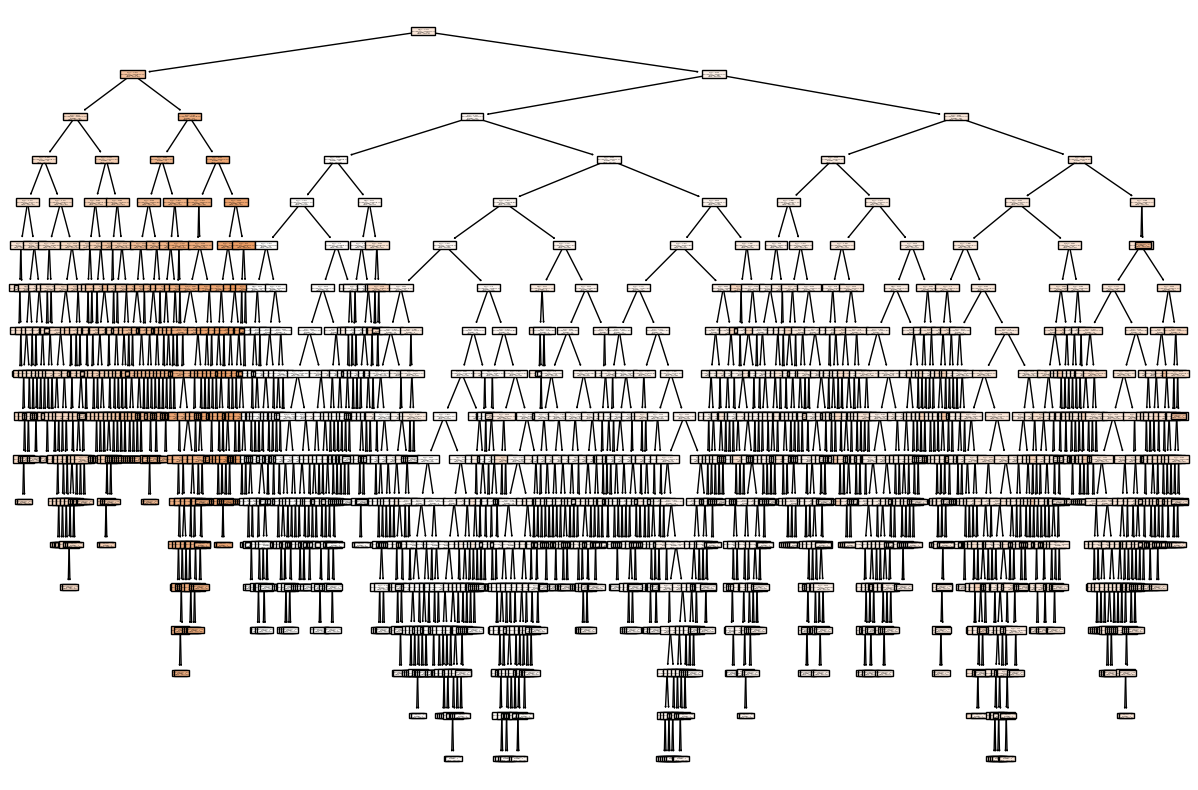

In [30]:
from sklearn import tree
plt.figure(figsize=(15,10))

tree.plot_tree(model,filled=True)
plt.show()